In [329]:

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats




import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Input, Dense
from keras.callbacks import Callback, EarlyStopping
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '99'

In [330]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/cpu:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3576497331794785392]

In [331]:
tf.Session()
with tf.device('/cpu:0'):
        a = tf.constant([1.0,2.0,3.0,4.0,5.0,6.0], shape = [2,3])
        b = tf.constant([1.0,2.0,3.0,4.0,5.0,6.0], shape = [3,2])
c = tf.matmul(a,b)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print(sess.run(c))   
options = tf.RunOptions(output_partition_graphs=True)
metadata=tf.RunMetadata()
c_val=sess.run(c,options=options, run_metadata=metadata)

print(metadata.partition_graphs)
sess.close()


[[22. 28.]
 [49. 64.]]
[node {
  name: "_send_MatMul_1_0"
  op: "_Send"
  input: "MatMul_1/_0__cf__628"
  device: "/job:localhost/replica:0/task:0/cpu:0"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "client_terminated"
    value {
      b: true
    }
  }
  attr {
    key: "recv_device"
    value {
      s: "/job:localhost/replica:0/task:0/cpu:0"
    }
  }
  attr {
    key: "send_device"
    value {
      s: "/job:localhost/replica:0/task:0/cpu:0"
    }
  }
  attr {
    key: "send_device_incarnation"
    value {
      i: 1663965776498615478
    }
  }
  attr {
    key: "tensor_name"
    value {
      s: "MatMul_1:0"
    }
  }
}
node {
  name: "MatMul_1/_0__cf__628"
  op: "Const"
  device: "/job:localhost/replica:0/task:0/cpu:0"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
         

In [332]:
tf.logging.set_verbosity(tf.logging.INFO)
sess=tf.InteractiveSession()

train = pd.read_csv('train.csv')
print('Shape of train data:', train.shape)

train = train.select_dtypes(exclude=['object'])
print('')
print('Train data with numerical features: ', train.shape)

train.drop('Id', axis=1, inplace = True)
train.fillna(0, inplace = True)

test = pd.read_csv('test.csv')
test = test.select_dtypes(exclude=['object'])
ID=test.Id
test.fillna(0, inplace = True)
test.drop('Id', axis=1, inplace = True)

print('')
print('List of features in dataset: ', list(train.columns))


Shape of train data: (1460, 81)

Train data with numerical features:  (1460, 38)

List of features in dataset:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [333]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 45)
clf.fit(train)
y_noano=clf.predict(train)
y_noano=pd.DataFrame(y_noano, columns =["Top"])
y_noano[y_noano['Top']==1].index.values

train = train.iloc[y_noano[y_noano['Top']==1].index.values]
train.reset_index(drop = True , inplace = True)
print("outliers: ", y_noano[y_noano['Top']==-1].shape[0])
print("rows w/out outliers", train.shape[0])

outliers:  146
rows w/out outliers 1314


In [334]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('SalePrice')

mat_train = np.matrix(train)
mat_test = np.matrix(test)
mat_new = np.matrix(train.drop('SalePrice', axis=1))
mat_y = np.array(train.SalePrice).reshape((1314,1))

prepro_y=MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test=MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train), columns = col_train)
test = pd.DataFrame(prepro_test.transform(mat_test), columns = col_train_bis)

train.head(10)
       

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.207668,0.062802,0.625,0.428571,0.953488,0.883333,0.12250,0.375532,0.0,...,0.000000,0.121514,0.000000,0.000000,0.0,0.0,0.000000,0.090909,0.50,0.403057
1,0.000000,0.255591,0.072904,0.500,0.857143,0.744186,0.433333,0.00000,0.520213,0.0,...,0.404891,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.363636,0.25,0.340220
2,0.235294,0.217252,0.087396,0.625,0.428571,0.937984,0.866667,0.10125,0.258511,0.0,...,0.000000,0.083665,0.000000,0.000000,0.0,0.0,0.000000,0.727273,0.50,0.437966
3,0.294118,0.191693,0.072464,0.625,0.428571,0.271318,0.333333,0.00000,0.114894,0.0,...,0.000000,0.069721,0.704663,0.000000,0.0,0.0,0.000000,0.090909,0.00,0.243639
4,0.235294,0.268371,0.113835,0.750,0.428571,0.930233,0.833333,0.21875,0.348404,0.0,...,0.260870,0.167331,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.50,0.499638
5,0.176471,0.271565,0.112561,0.375,0.428571,0.875969,0.750000,0.00000,0.389362,0.0,...,0.054348,0.059761,0.000000,0.629921,0.0,0.0,0.045161,0.818182,0.75,0.250621
6,0.000000,0.239617,0.077155,0.750,0.428571,0.961240,0.916667,0.11625,0.728191,0.0,...,0.346467,0.113546,0.000000,0.000000,0.0,0.0,0.000000,0.636364,0.25,0.632292
7,1.000000,0.159744,0.053755,0.375,0.571429,0.457364,0.000000,0.00000,0.452660,0.0,...,0.000000,0.007968,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.50,0.192439
8,0.000000,0.223642,0.086957,0.375,0.428571,0.658915,0.250000,0.00000,0.481915,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.090909,0.50,0.219203
9,0.235294,0.271565,0.093317,0.875,0.428571,0.968992,0.933333,0.17875,0.530851,0.0,...,0.199728,0.041833,0.000000,0.000000,0.0,0.0,0.000000,0.545455,0.00,0.720728


In [335]:
COLUMNS = col_train
FEATURES = col_train_bis
LABEL='SalePrice'

feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

training_set = train[COLUMNS]
prediction_set = train.SalePrice

x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES], prediction_set, test_size = 0.33, random_state=45)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set=pd.DataFrame(x_train, columns=FEATURES).merge(y_train,left_index=True, right_index=True)
training_set.head(10)

training_sub=training_set[col_train]

In [336]:
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head(10)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
634,0.235294,0.207668,0.067792,0.625,0.428571,0.984496,0.950000,0.00000,0.000000,0.000000,...,0.135870,0.047809,0.00000,0.0,0.000000,0.0,0.0,0.545455,0.25,0.335659
66,0.235294,0.236422,0.077655,0.625,0.428571,0.914729,0.800000,0.02500,0.000000,0.000000,...,0.000000,0.187251,0.00000,0.0,0.734848,0.0,0.0,1.000000,0.75,0.348366
16,0.000000,0.210863,0.108872,0.375,0.428571,0.961240,0.900000,0.00000,0.343617,0.000000,...,0.000000,0.203187,0.00000,0.0,0.000000,0.0,0.0,0.454545,0.50,0.287857
112,0.147059,0.175719,0.027124,0.375,0.714286,0.387597,0.000000,0.00000,0.061702,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.454545,0.25,0.120294
1012,0.000000,0.223642,0.054985,0.375,0.428571,0.612403,0.150000,0.00000,0.196277,0.000000,...,0.190217,0.000000,0.65285,0.0,0.000000,0.0,0.0,0.545455,0.00,0.228977
888,0.000000,0.265176,0.077814,0.875,0.428571,1.000000,1.000000,0.28125,0.875532,0.000000,...,0.228261,0.189243,0.00000,0.0,0.000000,0.0,0.0,0.272727,1.00,0.837538
502,0.000000,0.246006,0.076505,0.375,0.428571,0.728682,0.416667,0.00000,0.569681,0.083446,...,0.326087,0.075697,0.00000,0.0,0.000000,0.0,0.0,0.272727,0.00,0.313457
627,0.588235,0.188498,0.026193,0.625,0.428571,0.961240,0.900000,0.00000,0.008511,0.000000,...,0.211957,0.314741,0.00000,0.0,0.000000,0.0,0.0,0.545455,0.50,0.373966
599,0.000000,0.000000,0.113088,0.375,0.571429,0.589147,0.616667,0.00000,0.525532,0.000000,...,0.413043,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.909091,0.00,0.308802
350,0.235294,0.220447,0.055249,0.375,0.428571,0.635659,0.200000,0.18000,0.287234,0.000000,...,0.000000,0.334661,0.00000,0.0,0.000000,0.0,0.0,0.545455,0.25,0.312293


In [337]:
reg=linear_model.LinearRegression()

reg.fit(x_train, y_train)
pred=reg.predict(x_test)
loss_Score1=mean_squared_error(y_test,pred)
print("Loss Score for Simple Linear Regression on Testing Set: ", loss_score1)

Loss Score for Simple Linear Regression on Testing Set:  0.002693047129460962


In [338]:


lr = LinearRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)

gboost = XGBRegressor();
gboost.fit(x_train, y_train, verbose=False)

cross_val_boost = cross_val_score(gboost,x_test,y_test)
rmse_boost = np.sqrt(cross_val_boost.mean())

cross_val = cross_val_score(lr,x_test,y_test)
rmse = np.sqrt(cross_val.mean())
print(rmse)
print(rmse_boost)

TypeError: fit() got an unexpected keyword argument 'verbose'

In [339]:
# Neural Net

In [340]:
tf.logging.set_verbosity(tf.logging.ERROR)
regressor=tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, activation_fn = tf.nn.relu, hidden_units=[200,100,50,25,12])

In [341]:
training_set.reset_index(drop=True, inplace = True)

In [342]:
def input_fn(data_set, pred=False):
    if pred == False:
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        labels = tf.constant(data_set[LABEL].values)
        return feature_cols, labels
    
    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEAUTRES}
        return feature_cols

In [343]:
regressor.fit(input_fn = lambda: input_fn(training_set), steps=2000)

DNNRegressor(hidden_units=[200, 100, 50, 25, 12], dropout=None, optimizer=None, feature_columns=[_RealValuedColumn(column_name='MSSubClass', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='LotFrontage', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='LotArea', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='OverallQual', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='OverallCond', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='YearBuilt', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='YearRemodAdd', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='MasVnrArea', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)

In [344]:
ev = regressor.evaluate(input_fn = lambda: input_fn(testing_set), steps=1)

In [345]:
loss_Score2=ev["loss"]
print("Loss on Testing set for RELU: ", loss_Score2)

Loss on Testing set for RELU:  0.002606105


In [346]:
y=regressor.predict(input_fn=lambda: input_fn(testing_set))
predictions = list(itertools.islice(y, testing_set.shape[0]))

Exception AssertionError: AssertionError("Nesting violated for default stack of <class 'tensorflow.python.client.session.Session'> objects",) in <generator object run_feeds_iter at 0x1c383e5910> ignored


In [347]:
predictions = pd.DataFrame(prepro_y.inverse_transform(np.array(predictions).reshape(434,1)),columns = ['Prediction'])

In [348]:
reality = pd.DataFrame(prepro.inverse_transform(testing_set), columns = [COLUMNS]).SalePrice

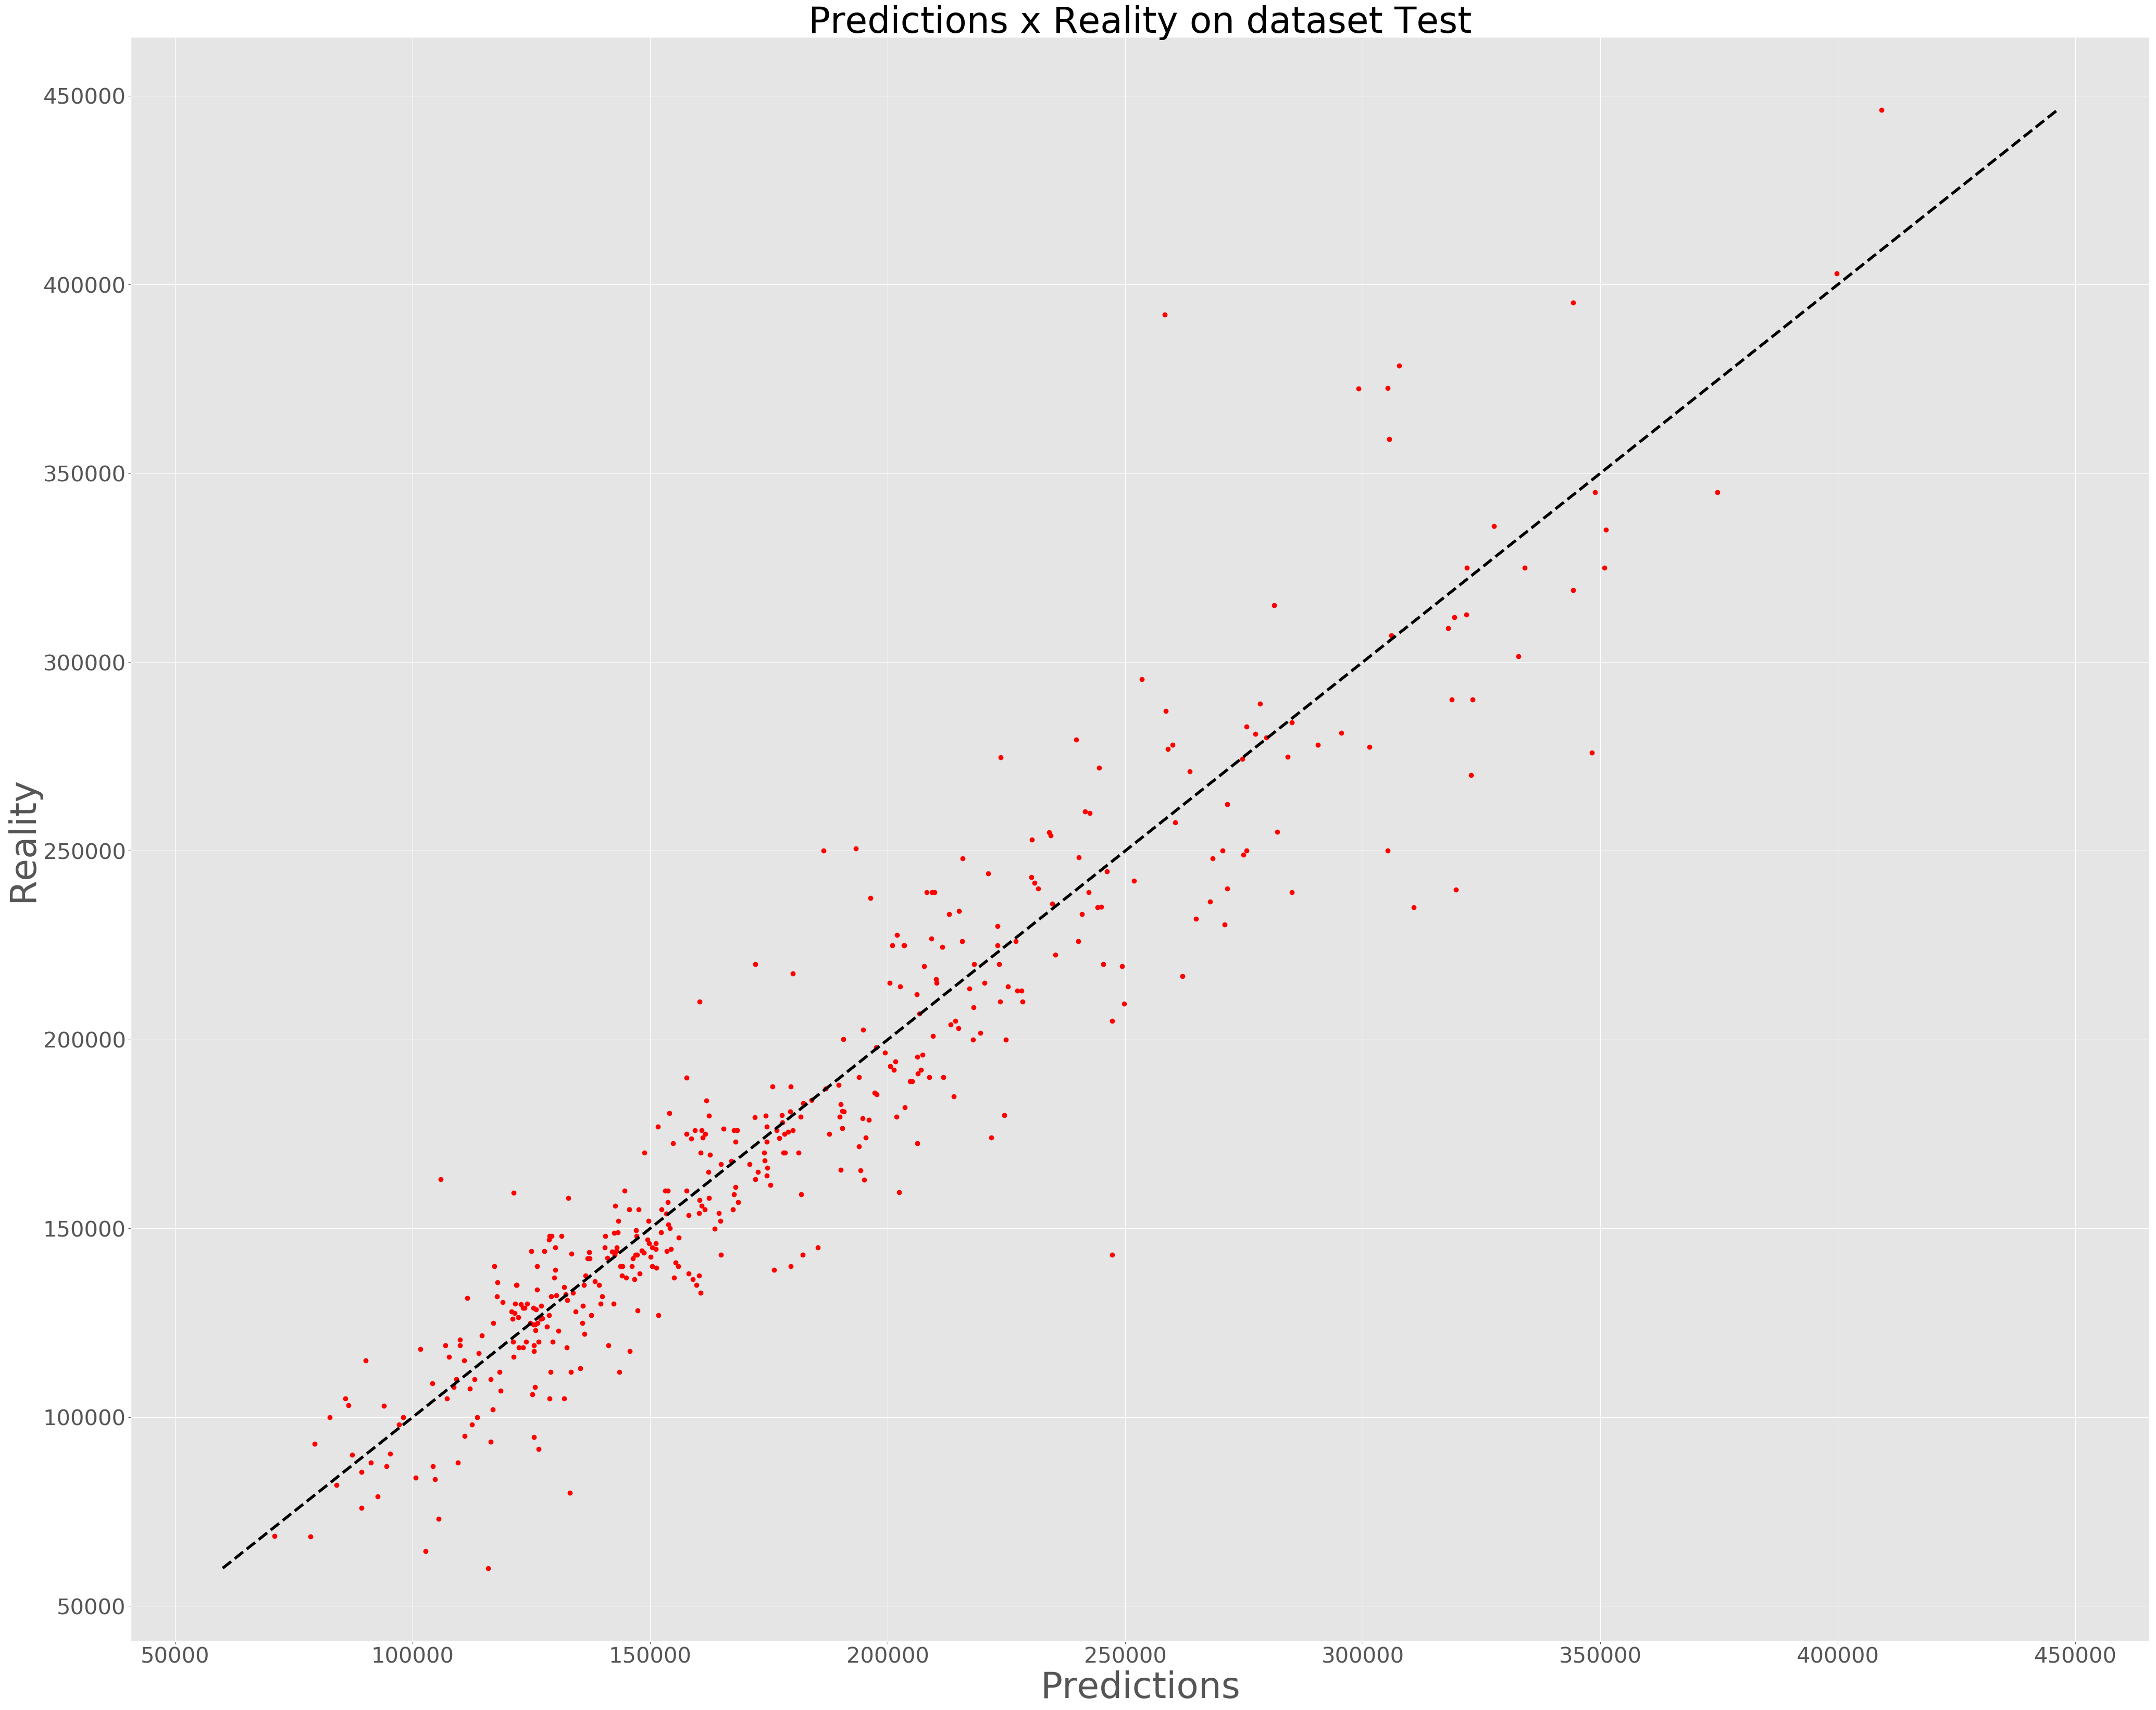

In [349]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions.values, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 50)
plt.ylabel('Reality', fontsize = 50)
plt.title('Predictions x Reality on dataset Test', fontsize = 50)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

In [350]:
def leaky_relu(x):
    return tf.nn.relu(x) - 0.01 * tf.nn.relu(-x)


In [351]:
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols,activation_fn = leaky_relu, hidden_units=[200, 100, 50, 25, 12])
regressor.fit(input_fn=lambda: input_fn(training_set), steps=2000)
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

In [352]:
loss_Score3=ev["loss"]
print("Loss on Testing set for RELU: ", loss_Score3)

Loss on Testing set for RELU:  0.002402168


In [353]:
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols,activation_fn = tf.nn.elu, hidden_units=[200, 100, 50, 25, 12])
regressor.fit(input_fn=lambda: input_fn(training_set), steps=2000)
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)


In [354]:
loss_Score4 = ev["loss"]
print("Loss on Testing set for RELU: ", loss_Score4)

Loss on Testing set for RELU:  0.003363848


In [355]:
list_score = [loss_Score1, loss_Score2, loss_Score3, loss_Score4]
list_model = ['Linear Regression', 'Relu_cont', 'LRelu_cont', 'Elu_cont']

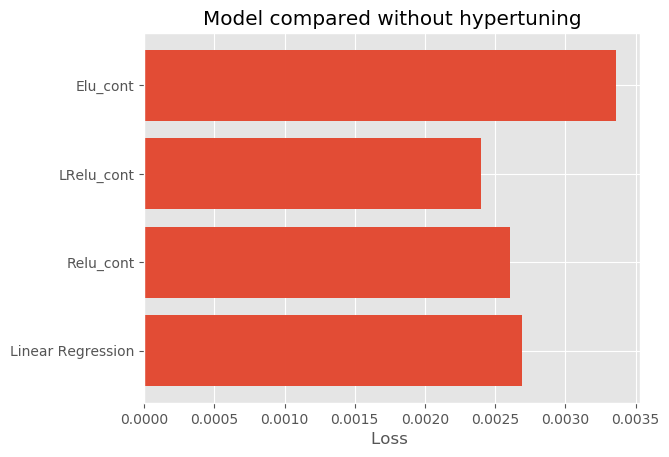

In [356]:
import matplotlib.pyplot as plt; plt.rcdefaults()

plt.style.use('ggplot')
objects = list_model
y_pos = np.arange(len(objects))
performance = list_score
 
plt.barh(y_pos, performance, align='center', alpha=0.99)
plt.yticks(y_pos, objects)
plt.xlabel('Loss ')
plt.title('Model compared without hypertuning')
 
plt.show()

In [357]:
#From: https://www.kaggle.com/zoupet/neural-network-model-for-house-prices-tensorflow

In [358]:
# Created a Neural Network with 5 hidden layers of 200, 100, 50, 25 and 12 units wiht differnt activation functions
# Using an AdaGrad Optimizer

In [359]:
tree_1=DecisionTreeRegressor()
tree_1.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [360]:
tree1_predicted_price = tree_1.predict(x_test)
loss_Score5=mean_squared_error(y_test,tree1_predicted_price)

In [361]:
print(loss_Score5)

0.0062127221939511715


In [362]:
list_score = [loss_Score1, loss_Score2, loss_Score3, loss_Score4, loss_Score5]
list_model = ['Linear Regression', 'Relu_cont', 'LRelu_cont', 'Elu_cont', 'Decision Tree']

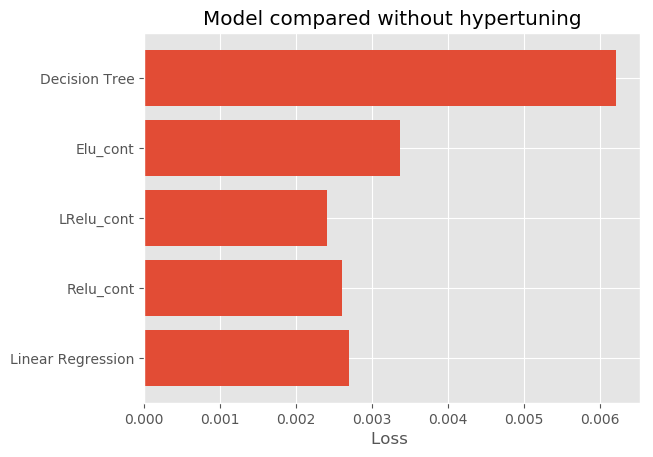

In [363]:
import matplotlib.pyplot as plt; plt.rcdefaults()

plt.style.use('ggplot')
objects = list_model
y_pos = np.arange(len(objects))
performance = list_score
 
plt.barh(y_pos, performance, align='center', alpha=0.99)
plt.yticks(y_pos, objects)
plt.xlabel('Loss ')
plt.title('Model compared without hypertuning')
 
plt.show()

In [364]:
# Another Nerual Net to see if we can do better

In [365]:
#Sequential model with two densely connected hidden layers, 
#The model is trained for 500 epochs
#Uses RMS Optimizer

In [366]:
def build_modelRelu():
    model = Sequential([
    Dense(64, activation=tf.nn.relu,
                       input_shape=(train.shape[1],)),
    Dense(64, activation=tf.nn.relu),
    Dense(1)
  ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2432      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________


In [367]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(training_set, training_set[LABEL], epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

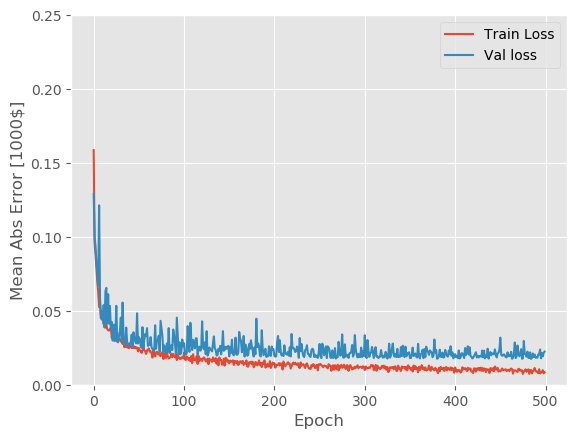

In [369]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 0.25])

plot_history(history)


....................................................................................................
....................................................................................................
..............................................................................

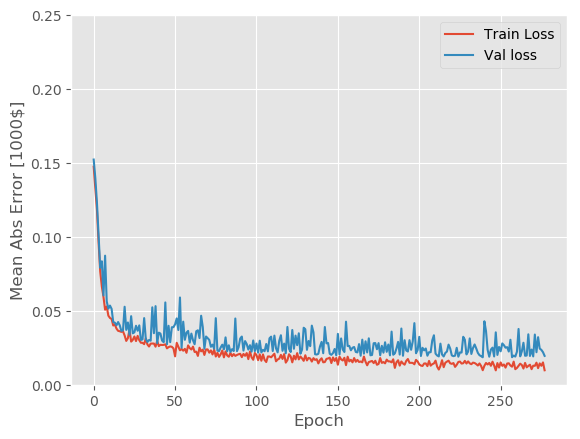

In [370]:
model = build_modelRelu()

# The patience parameter is the amount of epochs to check for improvement
early_stop = EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(training_set, training_set[LABEL], epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)


In [371]:
[loss, mse] = model.evaluate(training_set, training_set[LABEL], verbose=0)

print(loss)

loss_Score6=loss

0.0001642027839393863


In [378]:
def build_modelLeakyRelu():
    model = Sequential([
    Dense(64, activation=leaky_relu,
                       input_shape=(train.shape[1],)),
    Dense(64, activation=leaky_relu),
    Dense(1)
  ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                2432      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________


In [379]:
class PrintDot(Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(training_set, training_set[LABEL], epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

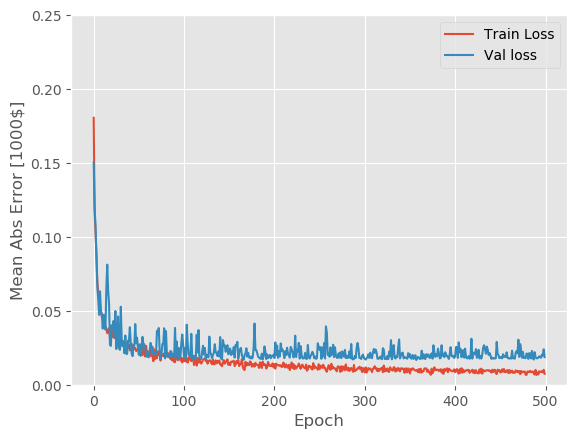

In [380]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 0.25])

plot_history(history)


....................................................................................................
.....................

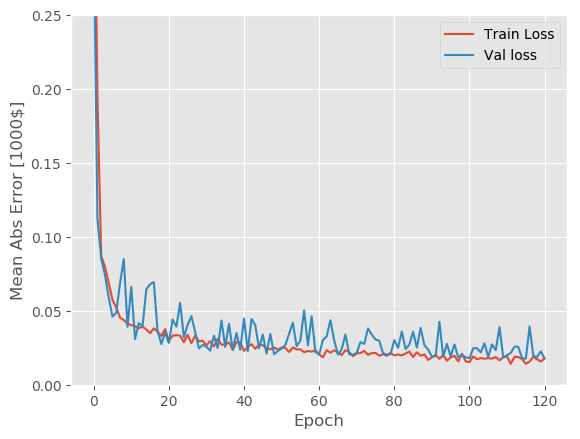

In [381]:
model = build_modelLeakyRelu()

# The patience parameter is the amount of epochs to check for improvement
early_stop = EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(training_set, training_set[LABEL], epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [382]:
[loss, mse] = model.evaluate(training_set, training_set[LABEL], verbose=0)

print(loss)

loss_Score7=loss

0.00019023220970253036


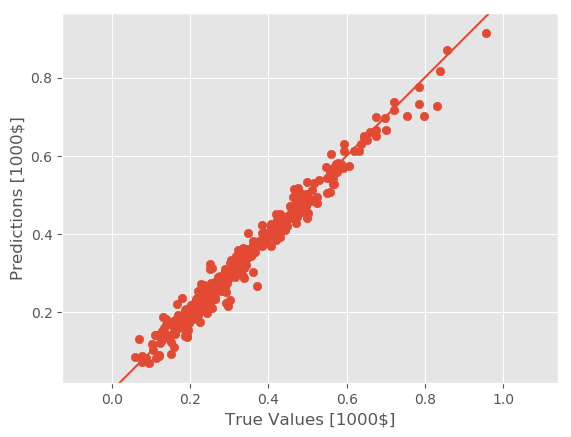

In [372]:
test_predictions = model.predict(testing_set).flatten()

plt.scatter(testing_set[LABEL], test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

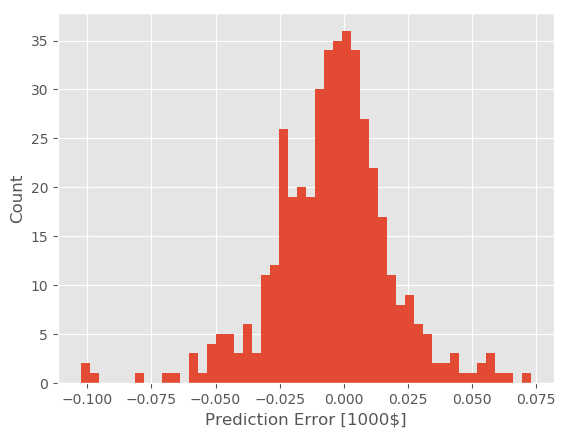

In [373]:
error = test_predictions - testing_set[LABEL]
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")

In [388]:
nn_score=[loss_Score6, loss_Score7]
list_nnModel=['Relu', 'LeakyRelu']

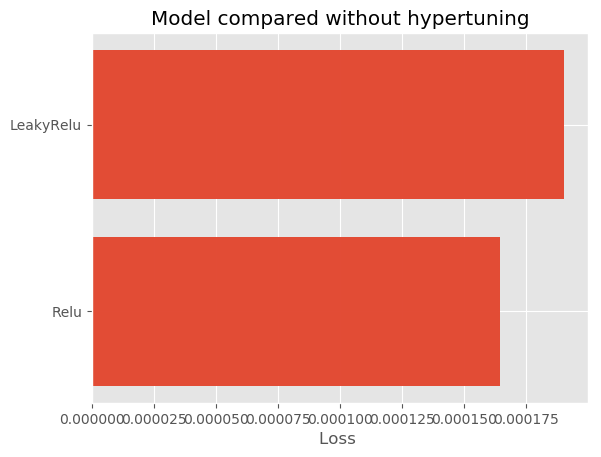

In [389]:
import matplotlib.pyplot as plt; plt.rcdefaults()

plt.style.use('ggplot')
objects = list_nnModel
y_pos = np.arange(len(objects))
performance = nn_score
 
plt.barh(y_pos, performance, align='center', alpha=0.99)
plt.yticks(y_pos, objects)
plt.xlabel('Loss ')
plt.title('Model compared without hypertuning')
 
plt.show()

In [385]:
list_score = [loss_Score1, loss_Score6, loss_Score7,  loss_Score5]
list_model = ['Linear Regression', 'Relu', 'LRelu', 'Decision Tree',]

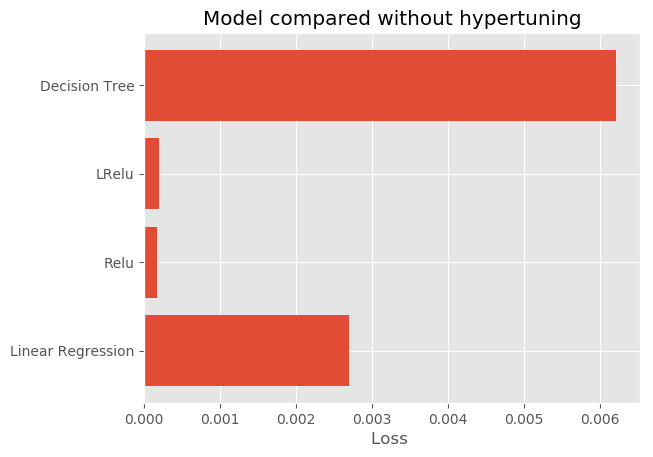

In [386]:
import matplotlib.pyplot as plt; plt.rcdefaults()

plt.style.use('ggplot')
objects = list_model
y_pos = np.arange(len(objects))
performance = list_score
 
plt.barh(y_pos, performance, align='center', alpha=0.99)
plt.yticks(y_pos, objects)
plt.xlabel('Loss ')
plt.title('Model compared without hypertuning')
 
plt.show()

In [ ]:
#From https://www.tensorflow.org/tutorials/keras/basic_regression
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.